# Tutorial 01: Simple Application out of the Box

This tutorial presents two simple examples:
1. Application to time series data with temporally persistent regimes
2. Application to gridded data with spatially localized regimes

In each case, for some very simple data-generating model, the application of out-of-the-box preconfigured methods is described, including the plotting of results. For customizations see also the other tutorials.

## 1. Time series

Generate data for a simple model, with one regime in the first half of data, another one in the second half
(this is not an interesting numerical experiment, rather a transparent and simple example).

In [1]:
import numpy as np

N = 1000

R = np.zeros(N, dtype=bool)
R[int(N/2):] = True

rng = np.random.default_rng()
X_noise = rng.standard_normal(N)
Y_noise = rng.standard_normal(N)
Z_noise = rng.standard_normal(N)

X = np.empty_like(X_noise)
Y = np.empty_like(Y_noise)
Z = np.empty_like(Z_noise)

def lag_one_or_zero(values, t):
    return values[t-1] if t > 0 else 0.0

for t in range(N):
    X[t] = X_noise[t] + 0.2 * lag_one_or_zero(X, t)
    Z[t] = Z_noise[t]
    Y[t] = Y_noise[t] + R[t] * lag_one_or_zero(X, t) + Z[t]

data = np.array([X,Y,Z]).T
var_names = ["X", "Y", "Z"]

Import the framework.

In [2]:
import GLDF

The framework itself is implemented in a modular way. The "frontend" modul provides helpers to assemble these modules to accomplish standard tasks.
Indeed, the 'run_mcd_temporal_regimes' helper applies already to this kind of data.

In [3]:
result = GLDF.run_hccd_temporal_regimes(data)
result.var_names = var_names

The frontend also produces a structured result, that is, while the underlying formal result is accessible through the result-object, it additionally exposes helpers for common utility tasks like plotting (by default via tigramite's plotting-libary for graphs and pyplot for curves etc). This also bundles (by default) lazily evaluated indicator resolutions.

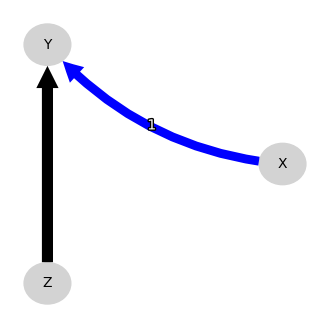

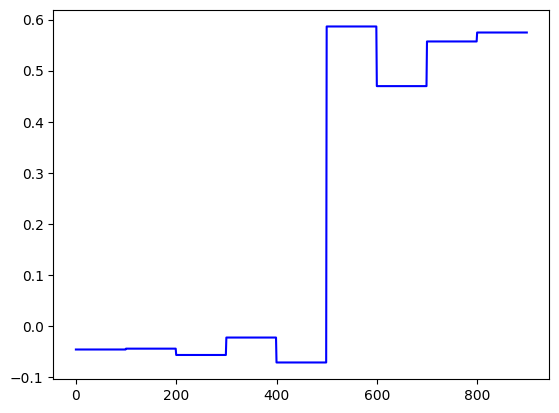

In [4]:
import matplotlib.pyplot as plt
result.plot_labeled_union_graph()
plt.show()
for mi in result.model_indicators():
    mi.plot_resolution()
    plt.show()

## 2. Spatial Patterns

Generate data for a simple two-dimensional spatial grid, with regimes in north/south and east/west.

In [5]:
import numpy as np

def get_data(seed=None):
    data_size = (100, 100)
    A = np.full(data_size, False)
    A[:50,:] = True
    B = np.full(data_size, False)
    B[:,:50] = True

    rng = np.random.default_rng(seed=seed)

    X = rng.standard_normal(data_size)
    Y = rng.standard_normal(data_size)
    L = rng.standard_normal(data_size) # latent
    Z = rng.standard_normal(data_size) + A * X + L
    W = rng.standard_normal(data_size) + Y + B * L

    return np.array([X,Y,Z,W]).transpose([1,2,0])

var_names = ["X", "Y", "Z", "W"]
data = get_data(seed=17062025)
print(data.shape)

(100, 100, 4)


The frontend also supports spatial patterns directly,
it again produces a structured result.

In [6]:
result = GLDF.run_hccd_spatial_regimes(data)
result.var_names = var_names

Note, that the frontend attaches suitable plotting and indicator resolution code different from that used for time-series, so user code for evaluation can be uniform in both cases:

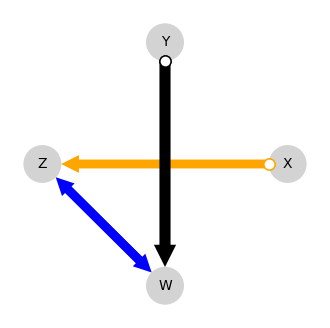

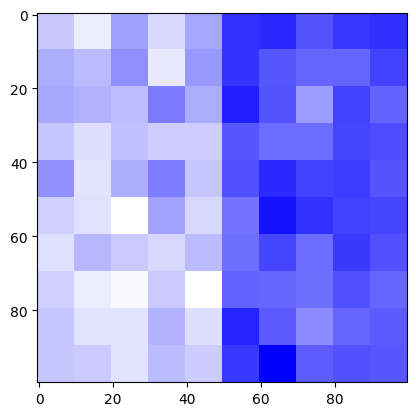

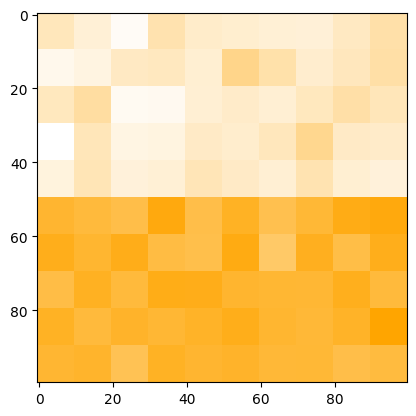

In [7]:
import matplotlib.pyplot as plt
result.plot_labeled_union_graph()
plt.show()
for mi in result.model_indicators():
    mi.plot_resolution()
    plt.show()